In [1]:
import sys
sys.path.append("D:\portfolio\Generalized-Linear-Models\src")

In [3]:
from preprocessing import preprocess_data
from naive_bayes_model import GaussianNaiveBayes
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

file_path = 'D:\portfolio\Generalized-Linear-Models\data\pima_diabetes.csv'
target_column = 'Outcome'
X_train, X_test, y_train, y_test = preprocess_data(file_path, target_column)
X_train = X_train.astype(float).to_numpy()
X_test = X_test.astype(float).to_numpy()
y_train = y_train.astype(float).to_numpy()
y_test = y_test.astype(float).to_numpy()


In [5]:

print(type(X_test))

<class 'numpy.ndarray'>


In [6]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

[0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 1.]


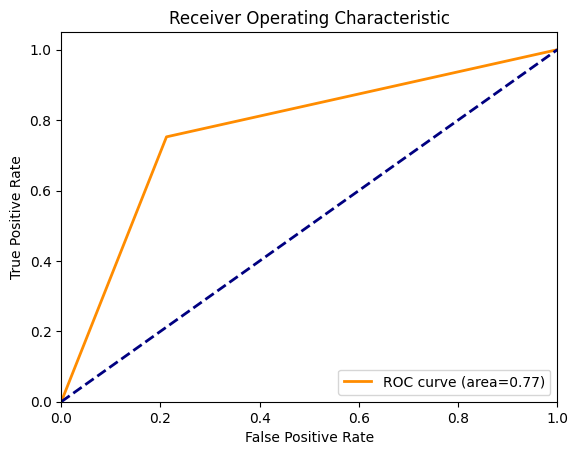

In [7]:
y_pred = model.predict(X_test)
print(y_pred)


fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()